# Telecom Churn Case Study


### Problem solving steps :-
<div class="alert alert-info" role="alert">
<br>
1. Business understanding <br>
1.1) Business problem overview <br>
1.2) Cutomer behaviour during churn <br>
<br>    
2. Problem Mapping 
<br>
<br>
3. Solution Approch
<br>
<br>
4. Data preparation <br>
    2.1) Filter high-value customers<br>
    2.2) Tag churners and remove attributes of the churn phase<br>
<br>
5. Exploratory Data Analysis<br>
    5.1) Checking for Missing Values and managing them<br>
    5.2) Removing unwanted columns<br>
    5.3) Dealing with correlation columns<br>
    5.4) Driving new features<br>
    5.5) Final Data Preperation<br>
    5.6) Standardization<br>
    5.7) handling class imbalance<br>
<br>    
6. Model building (Using Logistic Regression) <br>
    6.1) Model :- 1<br>
    6.2) Model :- 2<br>
    6.3) Model :- 3<br>
    6.4) Model :- 4 ( Final Model )<br>
<br>    
7. Model Evaluation<br>
    7.1) sensitivity<br>
    7.2) specificity<br>
    7.3) false postive rate<br>
    7.4) positive predictive rate <br>
    7.5) Negative predictive rate<br>
    7.6) Plotting ROC<br>
    7.7) Optimal cutoff point<br>
    7.8) Precision and recall tradeoff<br>
    7.9) Model performance on the train set<br>
    7.10) Model summary<br>
<br>
8. Top 10 predictors<br>
    8.1) Plots of important predictors for churn and non churn customers<br>

</div>

# 1. Business understanding

### 1.1) Business problem overview
<div class="alert alert-warning">
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

- This project is based on the Indian and Southeast Asian market.(Prepaid model)

- In this project, we will use the usage-based definition to define churn.

- In this project, we will define high-value customers based on a certain metric and predict churn only on high-value customers.

- it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
</div>

### 1.2) Customer behaviour during churn
<div class="alert alert-warning">
**The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

**The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc.it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

**The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.
</div>

# 2. Problem mapping 
<div class="alert alert-danger">
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
</div>

# 3. Solution Approch
<div class="alert alert-success">
- Build models to predict churn. The predictive model that we’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- In some cases, both of the above-stated goals can be achieved by a single machine learning model.
- Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance.

- A good choice to identify important variables is a logistic regression model or a model from the tree family. In the case of logistic regression, make sure to handle multicollinearity.

- After identifying important predictors, display them visually - we can use plots, summary tables etc. 

- Finally, recommend strategies to manage customer churn based on our observations.
</div>

# Coding part 

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

In [3]:
# Importing all datasets
telecom_raw_data = pd.read_csv("telecom_churn_data.csv")
telecom_raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Let's check the dimensions of the dataframe
telecom_raw_data.shape

(99999, 226)

In [5]:
# let's look at the statistical aspects of the dataframe
telecom_raw_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Create a copy of original data
telecom = telecom_raw_data.copy()

# 4. Data preparation 

###  4.1) Filter high-value customers
<div class="alert alert-info" role="alert">
    
we need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 30k rows.
</div>

In [7]:
all_col = telecom.columns.tolist()

In [8]:
rech_col = [col for col in all_col if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [9]:
# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_avg_rech_amt = ( telecom['total_rech_amt_6'].fillna(0) + telecom['total_rech_amt_7'].fillna(0)) / 2

# 70 percentile of the good_phase_avg_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_avg_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
telecom = telecom[good_phase_avg_rech_amt >= gd_phase_avg_rech_amt_70]
telecom.shape

70 Percentile of recharge amount is : 368.5


(30011, 226)

In [10]:
# Drop the columns which are used
telecom.drop(['total_rech_data_6', 'total_rech_data_7', 
                 'total_rech_data_8', 'total_rech_data_9', 
                 'av_rech_amt_data_6','av_rech_amt_data_7',
                 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
                axis=1, inplace=True)

In [11]:
telecom.shape

(30011, 218)

### 4.2) Tag churners and remove attributes of the churn phase
<div class="alert alert-info" role="alert">
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
</div>

In [12]:
# tagging columns for the 9th month 
mnth9_col = [col for col in all_col if '9'in col]

# tagging columns having ic
mnth9_ic_col = [col for col in mnth9_col if 'ic' in col and 'mou' in col]

# tagging columns having oc
mnth9_oc_col = [col for col in mnth9_col if 'oc' in col and 'mou' in col]

#tagging columns having vol 
mnth9_vol_col = [col for col in mnth9_col if 'vol' in col and 'mb' in col]

In [13]:
# Sum of all the ic columns
telecom['ic_sum'] = telecom_raw_data[mnth9_ic_col].sum(axis = 1)

# Sum of all the oc columns
telecom['oc_sum'] = telecom_raw_data[mnth9_oc_col].sum(axis = 1)

# Sum of all the vol columns
telecom['vol_sum'] = telecom_raw_data[mnth9_vol_col].sum(axis = 1)

churn_tag_col = ['vol_sum','oc_sum','ic_sum']

# creating churn column as the sum of new columns
telecom['churn'] = telecom[churn_tag_col].sum(axis = 1)

telecom.head(10)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,ic_sum,oc_sum,vol_sum,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,

In [14]:
# if the churn value is greater than 0 then it is a active user 
telecom['churn'] = telecom['churn'].apply(lambda x: 0 if x > 0 else 1)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,ic_sum,oc_sum,vol_sum,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31

In [15]:
telecom.churn.value_counts(normalize=True)

0    0.942988
1    0.057012
Name: churn, dtype: float64

In [16]:
# Drop the columns which are used
telecom.drop([ col for col in mnth9_col + churn_tag_col if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)

In [17]:
telecom.shape

(30011, 167)

# 5. Exploratory Data Analysis (EDA)

### 5.1) Checking for Missing Values and managing them

In [18]:
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
loc_og_t2t_mou_6              316
loc_og_t2t_mou_7              303
loc_og_t2t_mou_8              938
loc_og_t2m_mou_6              316
loc_og_t2m_mou_7              303
loc_og_t2m_mou_8              938
loc_og_t2f_mou

In [19]:
miss_value = round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
miss_value

count_rech_3g_6             62.02
fb_user_6                   62.02
max_rech_data_6             62.02
night_pck_user_6            62.02
count_rech_2g_6             62.02
date_of_last_rech_data_6    62.02
arpu_2g_6                   62.02
arpu_3g_6                   62.02
fb_user_7                   61.14
count_rech_3g_7             61.14
date_of_last_rech_data_7    61.14
count_rech_2g_7             61.14
arpu_2g_7                   61.14
night_pck_user_7            61.14
max_rech_data_7             61.14
arpu_3g_7                   61.14
night_pck_user_8            60.83
fb_user_8                   60.83
date_of_last_rech_data_8    60.83
arpu_3g_8                   60.83
max_rech_data_8             60.83
count_rech_2g_8             60.83
arpu_2g_8                   60.83
count_rech_3g_8             60.83
roam_ic_mou_8                3.13
std_ic_t2f_mou_8             3.13
std_og_t2m_mou_8             3.13
std_ic_t2m_mou_8             3.13
std_og_t2f_mou_8             3.13
std_ic_t2t_mou

In [20]:
drop_miss_col = miss_value[miss_value > 35].index.tolist()
drop_miss_col

['count_rech_3g_6',
 'fb_user_6',
 'max_rech_data_6',
 'night_pck_user_6',
 'count_rech_2g_6',
 'date_of_last_rech_data_6',
 'arpu_2g_6',
 'arpu_3g_6',
 'fb_user_7',
 'count_rech_3g_7',
 'date_of_last_rech_data_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'night_pck_user_8',
 'fb_user_8',
 'date_of_last_rech_data_8',
 'arpu_3g_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'arpu_2g_8',
 'count_rech_3g_8']

In [21]:
# droping missing value columns > 35% missing 
telecom.drop(drop_miss_col,axis=1,inplace=True)
telecom.shape

(30011, 143)

In [22]:
# re-Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

loc_ic_mou_8            3.13
og_others_8             3.13
loc_og_t2f_mou_8        3.13
loc_ic_t2t_mou_8        3.13
spl_og_mou_8            3.13
loc_og_t2m_mou_8        3.13
loc_ic_t2m_mou_8        3.13
loc_ic_t2f_mou_8        3.13
loc_og_t2t_mou_8        3.13
std_og_t2f_mou_8        3.13
roam_og_mou_8           3.13
loc_og_mou_8            3.13
std_ic_t2t_mou_8        3.13
roam_ic_mou_8           3.13
isd_og_mou_8            3.13
std_ic_t2m_mou_8        3.13
offnet_mou_8            3.13
std_ic_t2f_mou_8        3.13
onnet_mou_8             3.13
std_og_t2t_mou_8        3.13
std_ic_t2o_mou_8        3.13
std_og_mou_8            3.13
std_ic_mou_8            3.13
spl_ic_mou_8            3.13
std_og_t2m_mou_8        3.13
isd_ic_mou_8            3.13
std_og_t2c_mou_8        3.13
ic_others_8             3.13
loc_og_t2c_mou_8        3.13
date_of_last_rech_8     1.98
isd_og_mou_6            1.05
spl_og_mou_6            1.05
std_og_mou_6            1.05
loc_ic_t2f_mou_6        1.05
loc_ic_t2t_mou

#### obseravtion :- 
<div class="alert alert-success" role="alert">
the missing values in the remaining columns is less then 3.5%
</div>    

In [23]:
# Drop rows with missing values
for col in telecom.columns:
    telecom = telecom[~telecom[col].isna()]
    
# Re-check missing values
round(telecom.isna().sum() / len(telecom) * 100, 2).sort_values(ascending=False)

mobile_number           0.0
isd_ic_mou_6            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_7            0.0
std_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
std_ic_mou_8            0.0
std_ic_mou_6            0.0
total_rech_amt_6        0.0
std_ic_t2m_mou_6        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2o_mou_8        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
total_rech_num_8        0.0
total_rech_amt_7    

#### obseravtion :- 
<div class="alert alert-success" role="alert">
the missing value raws are also removed. Now the data don't have any null values 
</div>    

In [24]:
telecom.shape

(28487, 143)

### 5.2) Removing unwanted columns 

In [25]:
# Drop the column 'mobile_number' as it does not add any information 
telecom.drop('mobile_number', axis=1, inplace=True)
telecom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,

In [26]:
# removing all date columns 
date_col = [col for col in telecom.columns if 'date' in col]
telecom.drop(date_col, axis=1, inplace=True)
[col for col in telecom.columns if 'date' in col]

[]

In [27]:
telecom.shape

(28487, 136)

In [28]:
telecom.head(10)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,

In [29]:
# removing columns which having only one value (unique value)
drop_col_uniq_val = []

for col in telecom.columns:
    if telecom[f'{col}'].nunique() == 1:
        drop_col_uniq_val.append(col)

drop_col_uniq_val


['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [30]:
telecom.drop(drop_col_uniq_val, axis=1, inplace=True)
telecom.shape

(28487, 126)

### 5.3) Dealing with correlation columns

In [31]:
corr = telecom.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.697883
arpu_8              arpu_6              0.638198
                    arpu_7              0.760732
onnet_mou_7         onnet_mou_6         0.743161
onnet_mou_8         onnet_mou_6         0.615849
                    onnet_mou_7         0.799298
offnet_mou_7        offnet_mou_6        0.720012
offnet_mou_8        offnet_mou_7        0.750266
roam_ic_mou_8       roam_ic_mou_7       0.615482
roam_og_mou_6       roam_ic_mou_6       0.642791
roam_og_mou_7       roam_ic_mou_7       0.605475
roam_og_mou_8       roam_og_mou_7       0.601530
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.794737
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.707441
                    loc_og_t2t_mou_7    0.831583
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.778059
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.683782
                    loc_og_t2m_mou_7    0.816132
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.809753
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674121
                    

In [32]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
telecom.drop(drop_col_corr, axis=1, inplace=True)
telecom.shape

(28487, 87)

In [33]:
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,356.0,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,115.68,38.29,154.58,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,110,110,130,110,50,0,0.0,0.0,0.02,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,68.79,78.64,6.33,0.51,0.00,2.18,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,110,110,130,100,100,130,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,8.63,0.00,0.00,0.00,0.00,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,110,0,30,30,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,0


### 5.4) Driving new features

In [34]:
# Create a total mou = offnet + onnet

telecom['total_mou_6'] = telecom['onnet_mou_6'] + telecom['offnet_mou_6']
telecom['total_mou_7'] = telecom['onnet_mou_7'] + telecom['offnet_mou_7']
telecom['total_mou_8'] = telecom['onnet_mou_8'] + telecom['offnet_mou_8']

# Drop the unwanted columns
telecom.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

telecom.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,356.0,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
13,492.846,205.671,593.260,23.53,144.24,72.11,7.98,35.26,1.44,0.0,0.0,0.49,205.31,53.48,353.99,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,215.58,26.11,255.26,115.68,38.29,154.58,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,110,110,130,110,50,0,0.0,0.0,0.02,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0,915.07,227.67,1016.70
16,430.975,299.869,187.894,0.00,2.83,0.00,0.00,17.74,0.00,0.0,0.0,0.00,315.91,215.64,205.93,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,276.86,229.83,211.78,68.79,78.64,6.33,0.51,0.00,2.18,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,110,110,130,100,100,130,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,0,346.80,303.75,233.37
17,690.008,18.980,25.499,0.00,4.76,4.81,0.00,8.46,13.34,0.0,0.0,0.00,97.54,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,81.96,2.31,0.00,8.63,0.00,0.00,0.00,0.00,0.00,9.91,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,110,0,30,30,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,0,1247.55,9.28,13.33


####  creating new features that will each account for the good pahse by averaging out the values for 6th and 7th month

In [35]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in telecom.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    telecom[f'gd_ph_{col}'] = ( telecom[f'{col}_6'] + telecom[f'{col}_7'] ) / 2
    telecom.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
telecom.head()


,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_8,gd_ph_std_og_t2f_mou,gd_ph_total_rech_num,gd_ph_monthly_2g,gd_ph_total_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_t2c_mou,gd_ph_roam_ic_mou,gd_ph_std_ic_t2f_mou,gd_ph_spl_ic_mou,gd_ph_sachet_2g,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_sachet_3g,gd_ph_spl_og_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_loc_ic_mou,gd_ph_isd_og_mou,gd_ph_og_others,gd_ph_std_ic_mou,gd_ph_monthly_3g,gd_ph_last_day_rch_amt,gd_ph_std_og_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,378.20,13.37,5.0,0.0,566.555,0.0,0.0,24.860,43.215,0.105,0.0,18.165,1209.5150,1185.0,478.035,0.0,2.25,24.360,8.295,15.465,391.555,0.09,0.000,176.810,0.0,0.0,68.000
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,171.56,0.00,20.0,0.5,470.005,178.0,0.0,0.000,0.000,0.000,0.5,0.000,435.4720,122.0,333.135,0.0,0.00,0.290,0.000,0.000,52.630,0.00,0.000,13.545,0.0,25.0,136.870
13,593.260,72.11,1.44,0.49,353.99,0.00,655.18,1.29,4.78,0.0,255.26,154.58,1.91,474.41,0.0,393.39,21.44,11,130,0,0.02,0,3,0,0,2607,0.00,0.00,0.00,0.0,0,1016.70,0.00,5.0,0.0,571.370,0.0,0.0,83.885,0.000,0.225,0.0,21.620,349.2585,110.0,129.395,0.0,0.00,76.985,153.695,49.860,120.845,0.00,0.000,245.950,0.0,80.0,420.355
16,187.894,0.00,0.00,0.00,205.93,0.00,21.53,0.00,5.91,0.0,211.78,6.33,2.18,82.44,0.0,0.23,0.00,2,130,130,0.00,0,0,0,0,511,0.00,2.45,21.89,0.0,0,233.37,0.00,8.0,0.0,325.275,0.0,0.0,1.415,0.255,0.000,0.0,8.870,365.4220,110.0,265.775,0.0,1.63,73.715,0.000,0.000,253.345,0.00,0.000,119.860,0.0,100.0,48.990
17,25.499,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,0,0.00,0,0,0,0,667,0.00,0.00,0.00,0.0,0,13.33,0.00,10.5,0.0,628.415,0.0,0.0,2.380,0.000,0.000,0.0,4.230,354.4940,55.0,48.770,0.0,1.29,4.315,0.000,0.000,42.135,0.00,0.465,4.955,0.0,15.0,574.635


In [36]:
telecom.shape

(28487, 58)

#### vbc columns doesn't have number of month as suffix so it seemed to have missed out let's avergae out the columns for this feature too

In [37]:
# Create new column
telecom['gd_ph_vbc_3g'] = ( telecom['jul_vbc_3g'] + telecom['jun_vbc_3g'] ) / 2

# Drop redundant column
telecom.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
telecom['vbc_3g_8'] = telecom['aug_vbc_3g']
telecom.drop('aug_vbc_3g', axis=1, inplace=True)

telecom.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_std_og_t2f_mou,gd_ph_total_rech_num,gd_ph_monthly_2g,gd_ph_total_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_t2c_mou,gd_ph_roam_ic_mou,gd_ph_std_ic_t2f_mou,gd_ph_spl_ic_mou,gd_ph_sachet_2g,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_sachet_3g,gd_ph_spl_og_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_loc_ic_mou,gd_ph_isd_og_mou,gd_ph_og_others,gd_ph_std_ic_mou,gd_ph_monthly_3g,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,13.37,5.0,0.0,566.555,0.0,0.0,24.860,43.215,0.105,0.0,18.165,1209.5150,1185.0,478.035,0.0,2.25,24.360,8.295,15.465,391.555,0.09,0.000,176.810,0.0,0.0,68.000,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,0.00,20.0,0.5,470.005,178.0,0.0,0.000,0.000,0.000,0.5,0.000,435.4720,122.0,333.135,0.0,0.00,0.290,0.000,0.000,52.630,0.00,0.000,13.545,0.0,25.0,136.870,516.405,21.03
13,593.260,72.11,1.44,0.49,353.99,0.00,655.18,1.29,4.78,0.0,255.26,154.58,1.91,474.41,0.0,393.39,21.44,11,130,0,0.02,0,3,0,0,2607,0,1016.70,0.00,5.0,0.0,571.370,0.0,0.0,83.885,0.000,0.225,0.0,21.620,349.2585,110.0,129.395,0.0,0.00,76.985,153.695,49.860,120.845,0.00,0.000,245.950,0.0,80.0,420.355,0.000,0.00
16,187.894,0.00,0.00,0.00,205.93,0.00,21.53,0.00,5.91,0.0,211.78,6.33,2.18,82.44,0.0,0.23,0.00,2,130,130,0.00,0,0,0,0,511,0,233.37,0.00,8.0,0.0,325.275,0.0,0.0,1.415,0.255,0.000,0.0,8.870,365.4220,110.0,265.775,0.0,1.63,73.715,0.000,0.000,253.345,0.00,0.000,119.860,0.0,100.0,48.990,12.170,0.00
17,25.499,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,0,0.00,0,0,0,0,667,0,13.33,0.00,10.5,0.0,628.415,0.0,0.0,2.380,0.000,0.000,0.0,4.230,354.4940,55.0,48.770,0.0,1.29,4.315,0.000,0.000,42.135,0.00,0.465,4.955,0.0,15.0,574.635,0.000,0.00


In [38]:
telecom.shape

(28487, 56)

In [39]:
# Reset the index 
telecom.reset_index(inplace=True, drop=True)
telecom.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_std_og_t2f_mou,gd_ph_total_rech_num,gd_ph_monthly_2g,gd_ph_total_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_t2c_mou,gd_ph_roam_ic_mou,gd_ph_std_ic_t2f_mou,gd_ph_spl_ic_mou,gd_ph_sachet_2g,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_sachet_3g,gd_ph_spl_og_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_loc_ic_mou,gd_ph_isd_og_mou,gd_ph_og_others,gd_ph_std_ic_mou,gd_ph_monthly_3g,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,13.37,5.0,0.0,566.555,0.0,0.0,24.860,43.215,0.105,0.0,18.165,1209.5150,1185.0,478.035,0.0,2.25,24.360,8.295,15.465,391.555,0.09,0.000,176.810,0.0,0.0,68.000,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,0.00,20.0,0.5,470.005,178.0,0.0,0.000,0.000,0.000,0.5,0.000,435.4720,122.0,333.135,0.0,0.00,0.290,0.000,0.000,52.630,0.00,0.000,13.545,0.0,25.0,136.870,516.405,21.03
2,593.260,72.11,1.44,0.49,353.99,0.00,655.18,1.29,4.78,0.0,255.26,154.58,1.91,474.41,0.0,393.39,21.44,11,130,0,0.02,0,3,0,0,2607,0,1016.70,0.00,5.0,0.0,571.370,0.0,0.0,83.885,0.000,0.225,0.0,21.620,349.2585,110.0,129.395,0.0,0.00,76.985,153.695,49.860,120.845,0.00,0.000,245.950,0.0,80.0,420.355,0.000,0.00
3,187.894,0.00,0.00,0.00,205.93,0.00,21.53,0.00,5.91,0.0,211.78,6.33,2.18,82.44,0.0,0.23,0.00,2,130,130,0.00,0,0,0,0,511,0,233.37,0.00,8.0,0.0,325.275,0.0,0.0,1.415,0.255,0.000,0.0,8.870,365.4220,110.0,265.775,0.0,1.63,73.715,0.000,0.000,253.345,0.00,0.000,119.860,0.0,100.0,48.990,12.170,0.00
4,25.499,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,0,0.00,0,0,0,0,667,0,13.33,0.00,10.5,0.0,628.415,0.0,0.0,2.380,0.000,0.000,0.0,4.230,354.4940,55.0,48.770,0.0,1.29,4.315,0.000,0.000,42.135,0.00,0.465,4.955,0.0,15.0,574.635,0.000,0.00


In [40]:
telecom.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_std_og_t2f_mou,gd_ph_total_rech_num,gd_ph_monthly_2g,gd_ph_total_mou,gd_ph_vol_2g_mb,gd_ph_loc_og_t2c_mou,gd_ph_roam_ic_mou,gd_ph_std_ic_t2f_mou,gd_ph_spl_ic_mou,gd_ph_sachet_2g,gd_ph_roam_og_mou,gd_ph_arpu,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_sachet_3g,gd_ph_spl_og_mou,gd_ph_std_ic_t2t_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_loc_ic_mou,gd_ph_isd_og_mou,gd_ph_og_others,gd_ph_std_ic_mou,gd_ph_monthly_3g,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_vbc_3g,vbc_3g_8
count,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000,28487.000000
mean,551.597014,13.769088,22.332102,1.778709,271.426981,1.831627,365.598563,2.056114,7.162686,0.061867,244.268956,15.624337,2.775608,50.106028,0.028776,12.046197,1.292770,10.621336,167.152315,97.945905,71.909773,0.119212,0.637343,0.174115,0.146383,1279.162636,0.032190,665.944149,2.025678,12.161389,0.131955,728.906429,80.436913,1.731723,15.543716,2.994321,0.043171,0.559255,25.728048,591.024891,170.209201,289.277971,0.145663,6.759764,16.798586,11.700239,1.355441,251.522975,2.118259,0.370143,53.026006,0.175080,102.712939,407.083605,128.732081,132.866144
std,488.394273,76.117934,108.633169,7.553946,368.906373,11.816313,618.067167,45.735538,23.371533,3.407708,310.782227,73.707681,20.729451,143.851906,0.118731,76.344664,13.206793,9.465863,167.910414,141.437262,272.467075,0.363946,1.882384,0.585952,0.993088,977.224772,0.176508,684.249009,11.905779,8.732852,0.341314,612.356333,258.026124,6.739034,67.349481,19.144080,0.155468,1.693109,95.315841,410.644663,146.700073,359.886683,0.847294,18.600256,77.623334,67.602422,13.639197,300.262378,45.350069,1.875451,136.327937,0.536561,106.796648,576.170139,367.485535,394.146064
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-451.713500,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,308.540000,0.000000,0.000000,0.000000,46.550000,0.000000,3.385000,0.000000,0.000000,0.000000,58.935000,0.000000,0.000000,2.160000,0.000000,0.000000,0.000000,5.000000,98.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,484.000000,0.000000,233.925000,0.000000,6.500000,0.000000,342.457500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,383.513500,110.000000,65.840000,0.000000,0.000000,0.000000,0.000000,0.000000,70.277500,0.000000,0.000000,5.075000,0.000000,40.000000,10.262500,0.000000,0.000000
50%,463.942000,0.000000,0.000000,0.000000,159.610000,0.000000,88.140000,0.000000,0.710000,0.000000,151.990000,0.810000,0.000000,13.780000,0.000000,0.000000,0.000000,8.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,934.000

#### Going through the output of describe we can filter out the features that needs a second look


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

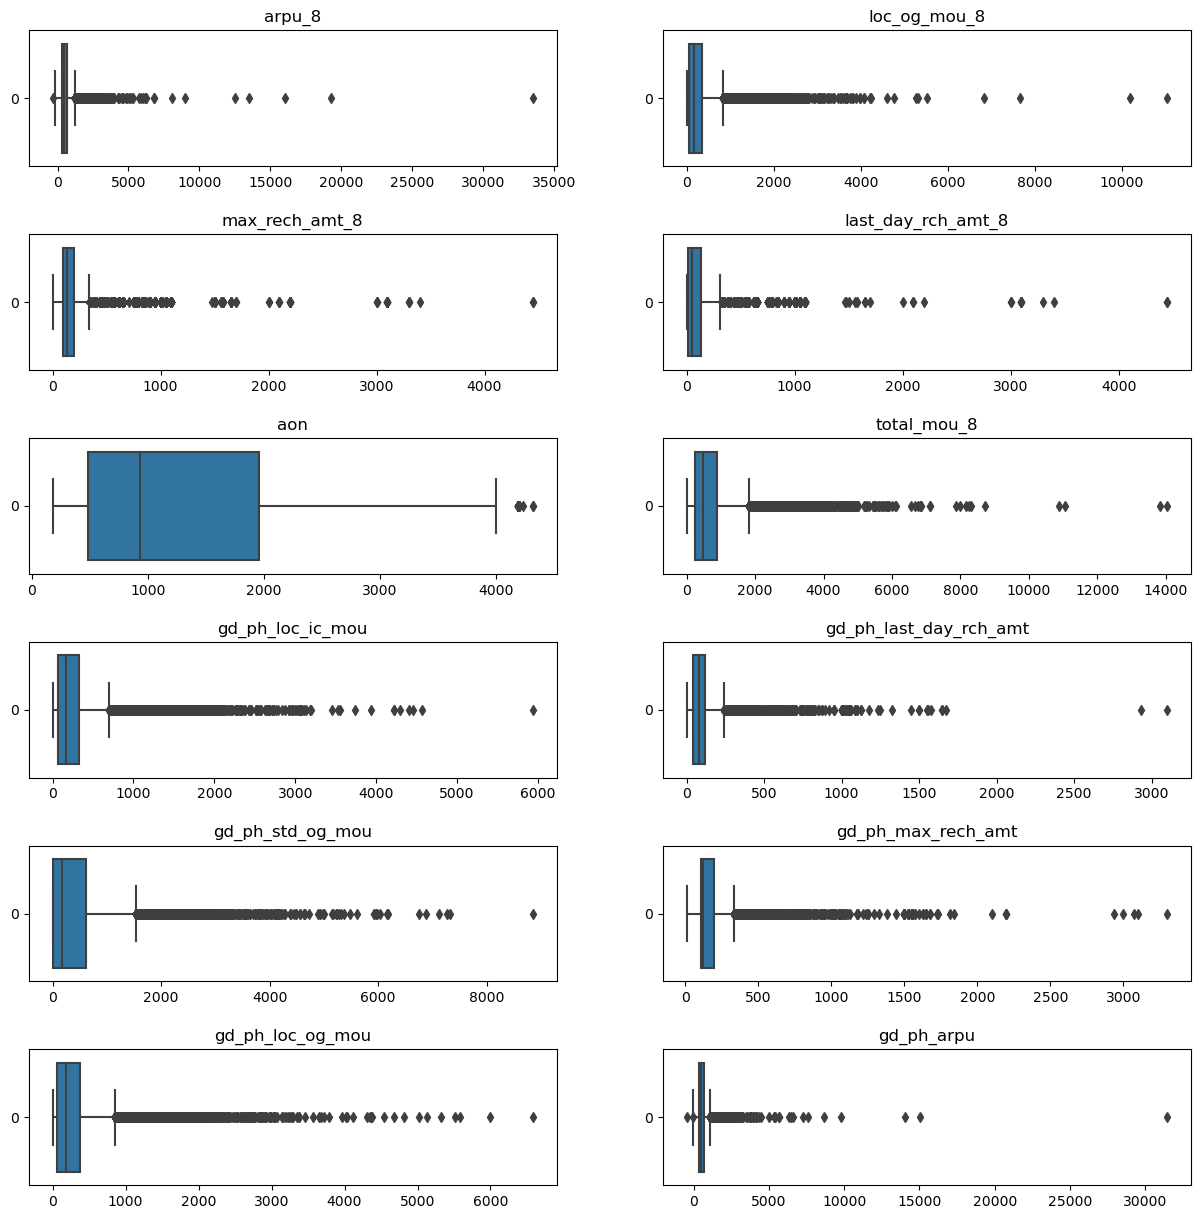

In [43]:
# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6,2, figsize=(15, 15))
for index, col in enumerate(col_boxplot):
    i,j = divmod(index,2)
    sns.boxplot(telecom[col], ax=axes[i,j],orient="h").set_title(col)
    
plt.subplots_adjust(hspace=0.5) 
plt.show()

#### Observations
<div class="alert alert-success" role="alert">
From the above plots we can define following upper limits to the sepected variables

> | Feature | Value |
> | --- | --- |
> | arpu_8 | 7000|
> | loc_og_mou_8 | 4000|
> | max_rech_amt_8 | 1000 |
> | last_day_rch_amt_8 | 1000 |
> | aon | 3000 | 
> | total_mou_8 | 4000 | 
> | gd_ph_loc_ic_mou | 3000 |
> | gd_ph_last_day_rch_amt | 1000 |
> | gd_ph_std_og_mou | 4000 | 
> | gd_ph_max_rech_amt | 1500 |
> | gd_ph_loc_og_mou | 3000 |
> | gd_ph_arpu | 7000 |

We will make these changes post exploration of other features
</div>

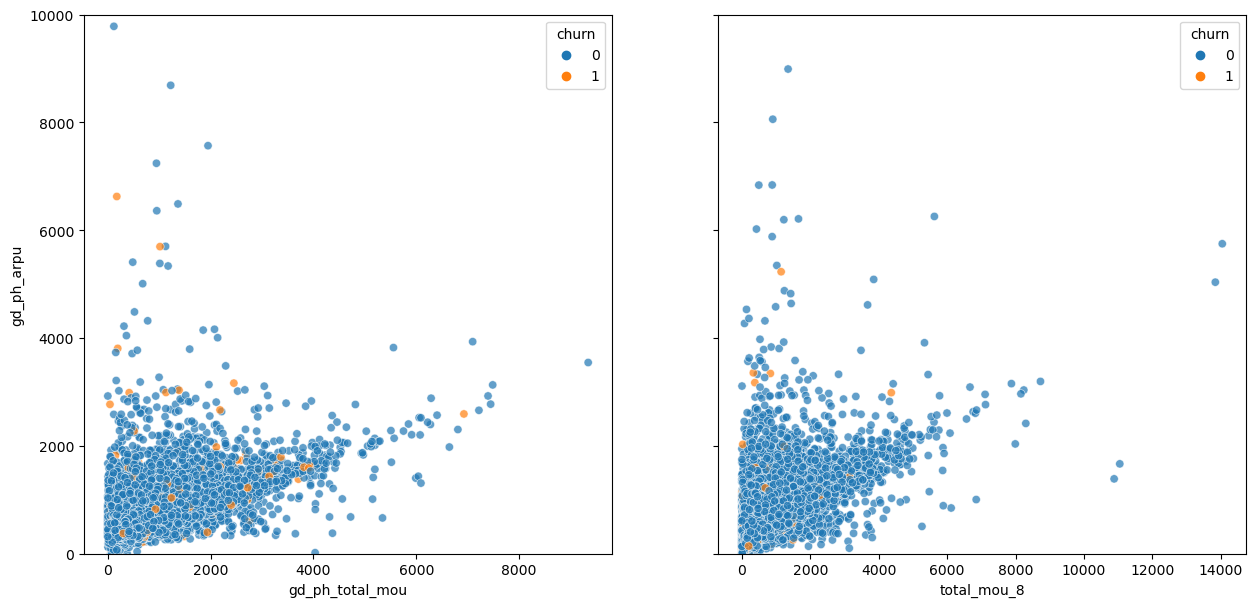

In [44]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=telecom, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

#### Observation :- 
<div class="alert alert-success" role="alert">
We can clearly see that MOU have dropped significantly for the churners in the action pahse i.e 8th month, thus hitting the revenue generated from them
</div>   

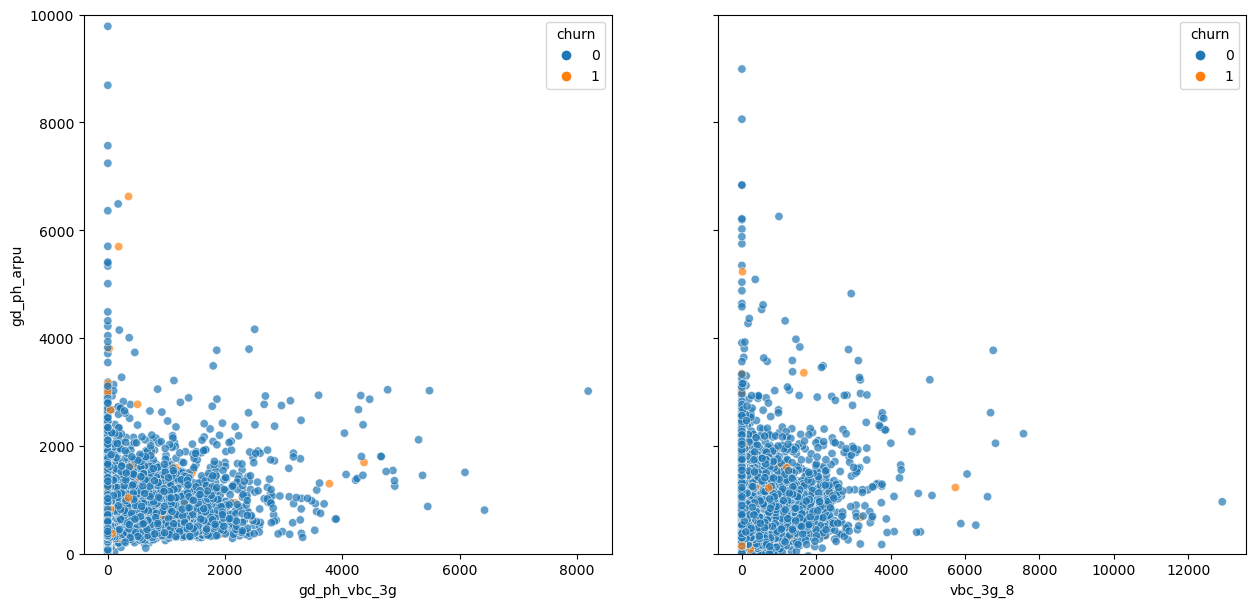

In [45]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=telecom, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

#### observation :- 
<div class="alert alert-success" role="alert">
    
- We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned
    
- Yet again we see that the revenue is higher towards the lesser consumption side
</div>

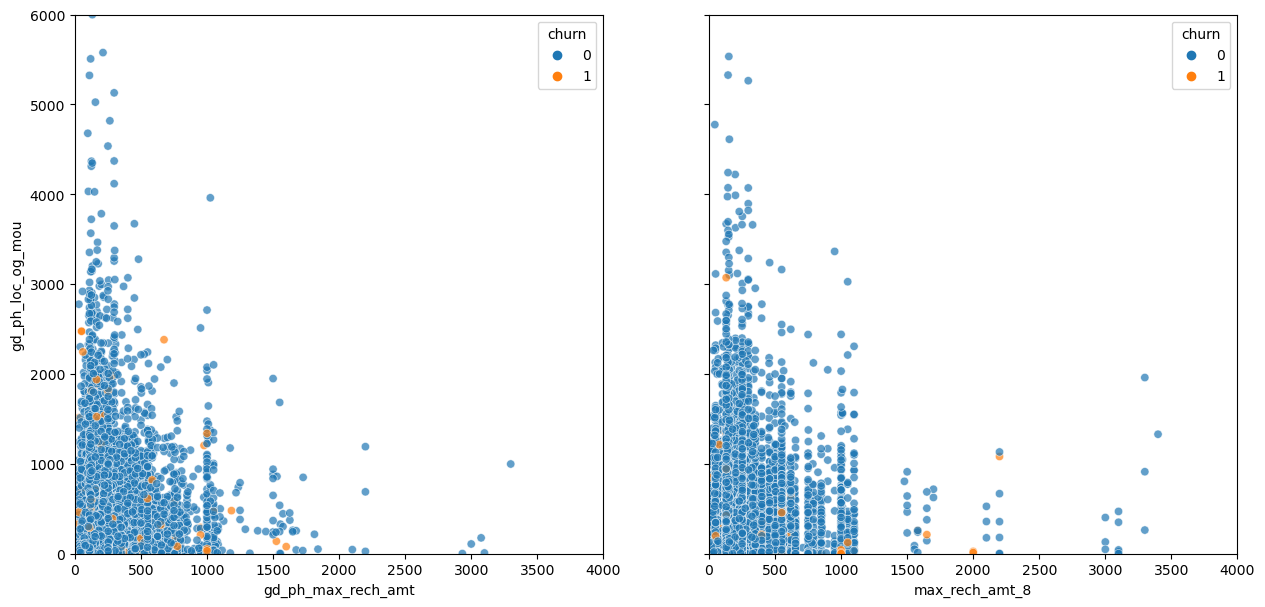

In [46]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=telecom, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

#### Observation:- 
<div class="alert alert-success" role="alert">
    
- Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
    
- Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more
</div>    

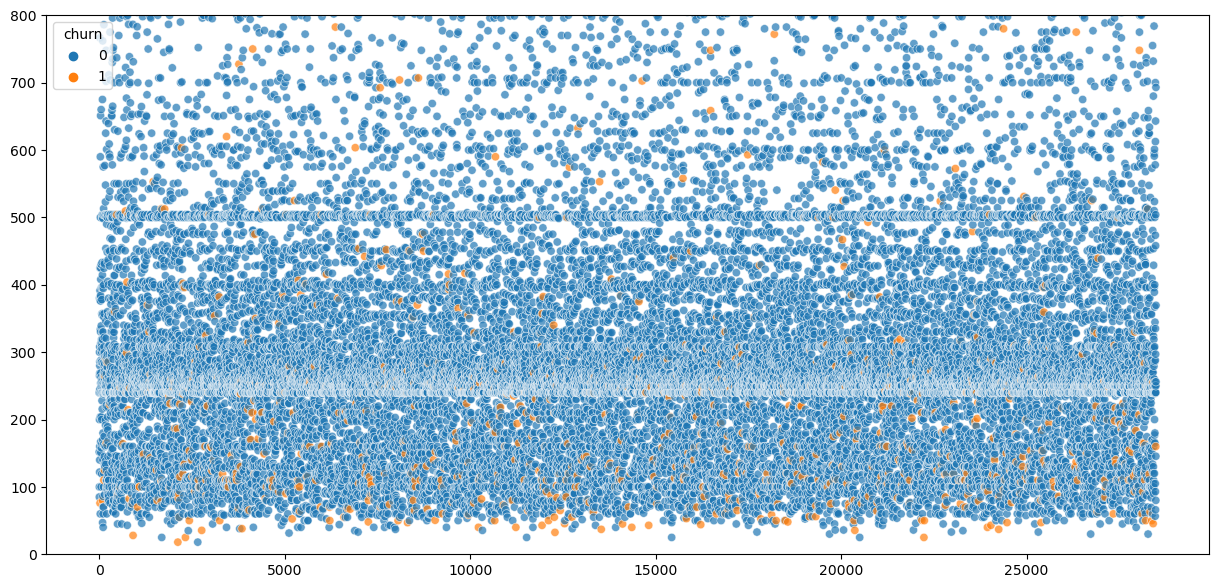

In [47]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=telecom.index, y=telecom['gd_ph_max_rech_amt'] + telecom['max_rech_amt_8'],
                hue=telecom['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

#### observation :- 
<div class="alert alert-success" role="alert">
We can see that users who had the max recharge amount less tha 200 churned more
</div>

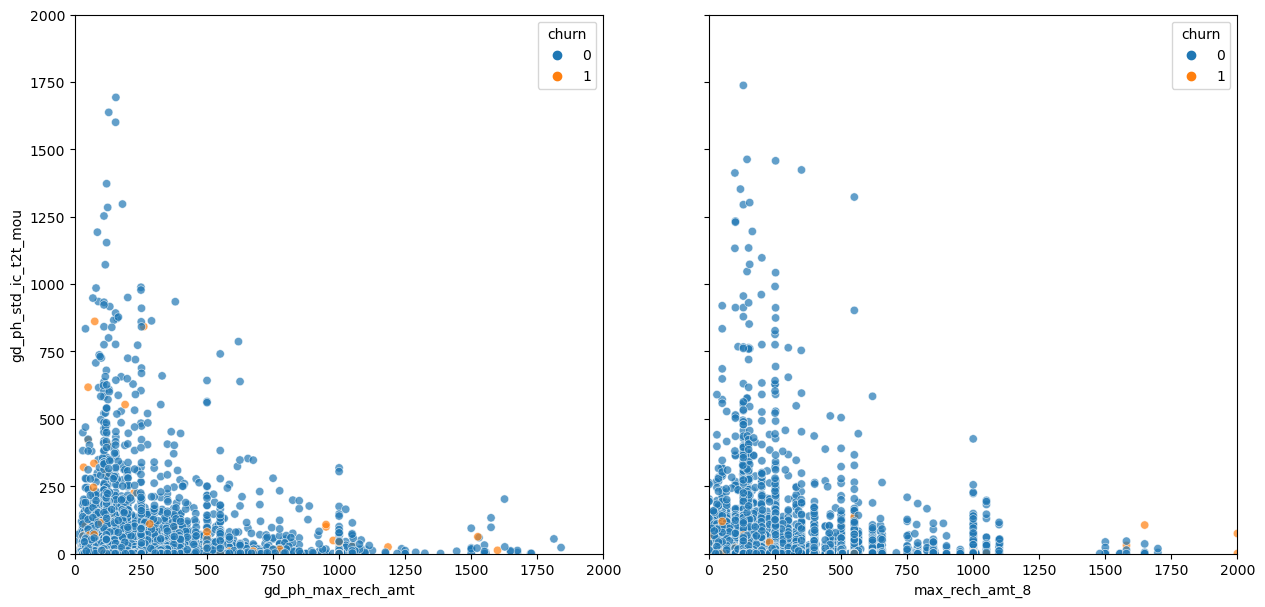

In [48]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=telecom, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=telecom, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

#### onservations :- 
<div class="alert alert-success" role="alert">
Users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more
</div>    

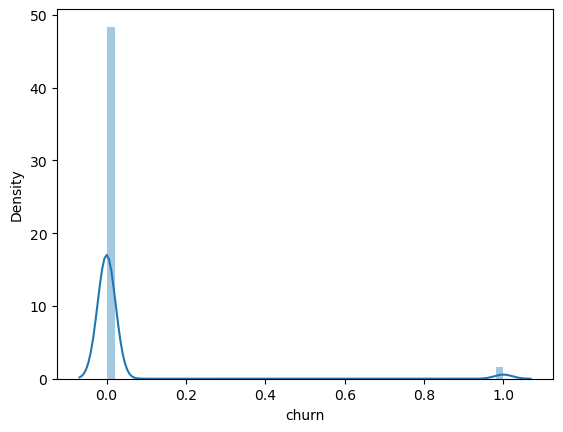

In [49]:
# Distribution of target variable

sns.distplot(telecom['churn'])
plt.show()

#### observation :- 
<div class="alert alert-success" role="alert">

- Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94%

- We will handle this imbalance using SMOTE algorithm

</div>

### 5.5) Final Data Preperation 

In [50]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    telecom[col] = telecom[col].apply(lambda x : x if x < value else value)

telecom[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,593.260,353.99,130,0,2607,1016.70,120.845,80.0,420.355,110.0,129.395,349.2585
3,187.894,205.93,130,130,511,233.37,253.345,100.0,48.990,110.0,265.775,365.4220
4,25.499,0.00,30,0,667,13.33,42.135,15.0,574.635,55.0,48.770,354.4940


In [51]:
y = telecom['churn']
X = telecom.drop('churn', axis=1)

### 5.6) Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### 5.7) handling class imbalance

In [53]:
telecom.churn.value_counts()

0    27570
1      917
Name: churn, dtype: int64

In [54]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [55]:
y_res.value_counts()

1    27570
0    27570
Name: churn, dtype: int64

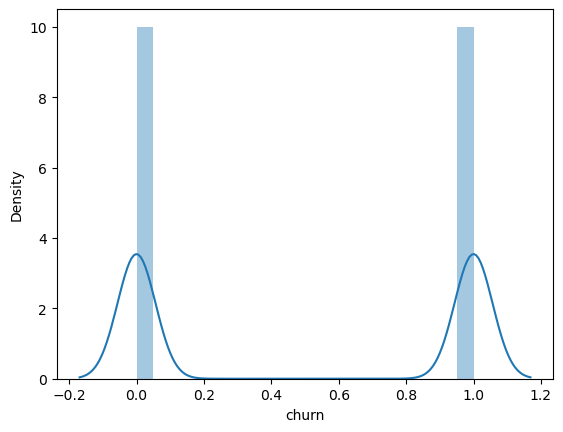

In [56]:
sns.distplot(y_res)
plt.show()

# 6. Model Building


#### Logistic Regression

In [57]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [58]:
import statsmodels.api as sm

### 6.1) Model :- 1 

In [59]:
# Initial logistic regression model
log_reg_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_reg_m1 .fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38542
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17771.
Date:                Mon, 05 Dec 2022   Deviance:                       35542.
Time:                        06:39:33   Pearson chi2:                 1.32e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3721
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4026      0.022    -63.209      0.000      -1.446      -1.359
arpu_8                     0.4693      0.048      9.840      0.000       0.376       0.563
roam_ic_mou_8             -0.3690      0.032    -11.627      0.000      -0.431      -0.307
roam_og_mou_8              0.0412      0.041      0.996      0.319      -0.040       0.122
loc_og_t2c_mou_8           0.1142      0.023      5.064      0.000       0.070       0.158
loc_og_mou_8              -0.4292      0.131     -3.284      0.001      -0.685      -0.173
std_og_t2f_mou_8          -0.1726      0.048     -3.588      0.000      -0.267      -0.078
std_og_mou_8               0.1130      0.204      0.554      0.579      -0.286       0.512
isd_og_mou_8              -0.3784      0.079     -4.815      0.000      -0.532      -0.224
spl_og_mou_8              -0.1013      0.033     -3.076      0.002      -0.166      -0.037
og_others_8                0.1028      0.024      4.230      0.000       0.055       0.150
loc_ic_mou_8              -1.5020      0.055    -27.329      0.000      -1.610      -1.394
std_ic_t2t_mou_8          -0.5222      0.068     -7.682      0.000      -0.655      -0.389
std_ic_t2f_mou_8          -0.0092      0.043     -0.215      0.830      -0.093       0.075
std_ic_mou_8              -0.5116      0.055     -9.242      0.000      -0.620      -0.403
spl_ic_mou_8              -0.3118      0.022    -14.138      0.000      -0.355      -0.269
isd_ic_mou_8              -0.0880      0.030     -2.915      0.004      -0.147      -0.029
ic_others_8                0.1803      0.030      6.015      0.000       0.122       0.239
total_rech_num_8          -0.4430      0.033    -13.443      0.000      -0.508      -0.378
max_rech_amt_8             0.2340      0.024      9.570      0.000       0.186       0.282
last_day_rch_amt_8        -0.6628      0.023    -29.247      0.000      -0.707      -0.618
vol_2g_mb_8               -0.1885      0.032     -5.831      0.000      -0.252      -0.125
monthly_2g_8              -0.5435      0.030    -18.146      0.000      -0.602      -0.485
sachet_2g_8               -0.4338      0.029    -15.220      0.000      -0.490      -0.378
monthly_3g_8              -0.8555      0.040    -21.229      0.000      -0.934      -0.777
sachet_3g_8               -0.4054      0.042     -9.668      0.000      -0.488      -0.323
aon                       -0.4449      0.017    -26.825      0.000      -0.477      -0.412
total_mou_8               -1.0224      0.216     -4.726      0.000      -1.446      -0.598
gd_ph_std_og_t2f_mou      -0.0187      0.039     -0.478      0.632      -0.095       0.058
gd_ph_total_rech_num       0.2620      0.026      9.981      0.000       0.211       0.313
gd_ph_monthly_2g          -0.1025      0.024     -4.208      0.000      -0.150  

#### RFE for feature selection 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'isd_og_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'total_mou_8',
       'gd_ph_total_rech_num', 'gd_ph_total_mou', 'gd_ph_roam_og_mou',
       'gd_ph_loc_og_mou', 'gd_ph_std_ic_t2t_mou', 'gd_ph_ic_others',
       'gd_ph_loc_ic_mou', 'gd_ph_isd_og_mou', 'gd_ph_monthly_3g',
       'gd_ph_std_og_mou'],
      dtype='object')

### 6.2) Model :- 2

In [62]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38572
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18168.
Date:                Mon, 05 Dec 2022   Deviance:                       36336.
Time:                        06:40:03   Pearson chi2:                 1.17e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3092      0.021    -62.071      0.000      -1.351      -1.268
arpu_8                   0.6271      0.033     18.901      0.000       0.562       0.692
roam_ic_mou_8           -0.3030      0.024    -12.799      0.000      -0.349      -0.257
loc_og_mou_8            -0.5003      0.047    -10.672      0.000      -0.592      -0.408
isd_og_mou_8            -0.3586      0.072     -4.993      0.000      -0.499      -0.218
loc_ic_mou_8            -1.4745      0.054    -27.376      0.000      -1.580      -1.369
std_ic_t2t_mou_8        -0.5447      0.063     -8.600      0.000      -0.669      -0.421
std_ic_mou_8            -0.3539      0.037     -9.445      0.000      -0.427      -0.280
spl_ic_mou_8            -0.3204      0.022    -14.604      0.000      -0.363      -0.277
total_rech_num_8        -0.6746      0.031    -21.939      0.000      -0.735      -0.614
last_day_rch_amt_8      -0.5746      0.022    -26.485      0.000      -0.617      -0.532
monthly_2g_8            -0.5911      0.024    -24.513      0.000      -0.638      -0.544
monthly_3g_8            -0.8532      0.037    -23.065      0.000      -0.926      -0.781
sachet_3g_8             -0.3792      0.033    -11.327      0.000      -0.445      -0.314
aon                     -0.4424      0.016    -27.553      0.000      -0.474      -0.411
total_mou_8             -0.8971      0.035    -25.665      0.000      -0.966      -0.829
gd_ph_total_rech_num     0.3242      0.022     14.555      0.000       0.281       0.368
gd_ph_total_mou         -1.5153      0.280     -5.403      0.000      -2.065      -0.966
gd_ph_roam_og_mou        0.3912      0.047      8.319      0.000       0.299       0.483
gd_ph_loc_og_mou         1.2496      0.163      7.667      0.000       0.930       1.569
gd_ph_std_ic_t2t_mou     0.3256      0.029     11.309      0.000       0.269       0.382
gd_ph_ic_others         -0.3119      0.058     -5.409      0.000      -0.425      -0.199
gd_ph_loc_ic_mou         0.8139      0.038     21.564      0.000       0.740       0.888
gd_ph_isd_og_mou         0.4598      0.074      6.254      0.000       0.316       0.604
gd_ph_monthly_3g         0.3048      0.024     12.895      0.000       0.258       0.351
gd_ph_std_og_mou         1.7424      0.260      6.693      0.000       1.232       2.253
========================================================================================
"""

In [63]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.253102,0
1,1,0.669006,1
2,1,0.518297,1
3,1,0.786864,1
4,0,0.291916,0


In [64]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14855  4362]
 [ 3459 15922]]

Accuracy : 0.7973729208767294


In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,gd_ph_std_og_mou,90.94
16,gd_ph_total_mou,90.68
18,gd_ph_loc_og_mou,27.60
22,gd_ph_isd_og_mou,9.93
3,isd_og_mou_8,9.77
14,total_mou_8,4.22
2,loc_og_mou_8,4.16
0,arpu_8,4.01
17,gd_ph_roam_og_mou,3.70
4,loc_ic_mou_8,3.70


In [66]:
# Since the VIF for "gd_ph_std_og_mou" is very high we will drop it
rfe_col = rfe_col.drop('gd_ph_std_og_mou', 1)

### 6.3) Model :- 3

In [67]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38573
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18203.
Date:                Mon, 05 Dec 2022   Deviance:                       36407.
Time:                        06:40:05   Pearson chi2:                 1.43e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3579
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3003      0.021    -61.889      0.000      -1.342      -1.259
arpu_8                   0.6030      0.033     18.203      0.000       0.538       0.668
roam_ic_mou_8           -0.3017      0.024    -12.747      0.000      -0.348      -0.255
loc_og_mou_8            -0.5054      0.047    -10.798      0.000      -0.597      -0.414
isd_og_mou_8            -0.3643      0.070     -5.178      0.000      -0.502      -0.226
loc_ic_mou_8            -1.4677      0.054    -27.315      0.000      -1.573      -1.362
std_ic_t2t_mou_8        -0.5443      0.063     -8.597      0.000      -0.668      -0.420
std_ic_mou_8            -0.3507      0.037     -9.383      0.000      -0.424      -0.277
spl_ic_mou_8            -0.3223      0.022    -14.695      0.000      -0.365      -0.279
total_rech_num_8        -0.6779      0.031    -22.094      0.000      -0.738      -0.618
last_day_rch_amt_8      -0.5736      0.022    -26.468      0.000      -0.616      -0.531
monthly_2g_8            -0.5938      0.024    -24.606      0.000      -0.641      -0.547
monthly_3g_8            -0.8446      0.037    -22.899      0.000      -0.917      -0.772
sachet_3g_8             -0.3840      0.034    -11.451      0.000      -0.450      -0.318
aon                     -0.4414      0.016    -27.531      0.000      -0.473      -0.410
total_mou_8             -0.8683      0.035    -24.978      0.000      -0.936      -0.800
gd_ph_total_rech_num     0.3259      0.022     14.662      0.000       0.282       0.370
gd_ph_total_mou          0.3443      0.023     15.015      0.000       0.299       0.389
gd_ph_roam_og_mou        0.0963      0.015      6.456      0.000       0.067       0.126
gd_ph_loc_og_mou         0.1853      0.032      5.784      0.000       0.123       0.248
gd_ph_std_ic_t2t_mou     0.3252      0.029     11.281      0.000       0.269       0.382
gd_ph_ic_others         -0.3090      0.058     -5.372      0.000      -0.422      -0.196
gd_ph_loc_ic_mou         0.8039      0.038     21.318      0.000       0.730       0.878
gd_ph_isd_og_mou         0.3338      0.069      4.808      0.000       0.198       0.470
gd_ph_monthly_3g         0.3002      0.024     12.719      0.000       0.254       0.346
========================================================================================
"""

In [68]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.274622,0
1,1,0.670205,1
2,1,0.521660,1
3,1,0.788765,1
4,0,0.296180,0


In [69]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14844  4373]
 [ 3458 15923]]

Accuracy : 0.7971138400953417


In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,gd_ph_isd_og_mou,9.80
3,isd_og_mou_8,9.73
14,total_mou_8,4.21
2,loc_og_mou_8,4.14
0,arpu_8,4.01
4,loc_ic_mou_8,3.70
18,gd_ph_loc_og_mou,3.34
21,gd_ph_loc_ic_mou,3.29
8,total_rech_num_8,3.02
15,gd_ph_total_rech_num,2.31


In [71]:
# droping "gd_ph_isd_og_mou"
rfe_col = rfe_col.drop('gd_ph_isd_og_mou', 1)

### 6.4) Model :- 4

In [72]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
log_reg_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_reg_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38598
Model:                            GLM   Df Residuals:                    38574
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18217.
Date:                Mon, 05 Dec 2022   Deviance:                       36433.
Time:                        06:40:07   Pearson chi2:                 1.44e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3575
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3008      0.021    -61.890      0.000      -1.342      -1.260
arpu_8                   0.6033      0.033     18.053      0.000       0.538       0.669
roam_ic_mou_8           -0.3023      0.024    -12.757      0.000      -0.349      -0.256
loc_og_mou_8            -0.5096      0.047    -10.874      0.000      -0.601      -0.418
isd_og_mou_8            -0.0627      0.029     -2.196      0.028      -0.119      -0.007
loc_ic_mou_8            -1.4694      0.054    -27.328      0.000      -1.575      -1.364
std_ic_t2t_mou_8        -0.5402      0.063     -8.547      0.000      -0.664      -0.416
std_ic_mou_8            -0.3518      0.037     -9.414      0.000      -0.425      -0.279
spl_ic_mou_8            -0.3218      0.022    -14.674      0.000      -0.365      -0.279
total_rech_num_8        -0.6879      0.031    -22.432      0.000      -0.748      -0.628
last_day_rch_amt_8      -0.5759      0.022    -26.471      0.000      -0.619      -0.533
monthly_2g_8            -0.5943      0.024    -24.619      0.000      -0.642      -0.547
monthly_3g_8            -0.8391      0.037    -22.860      0.000      -0.911      -0.767
sachet_3g_8             -0.3858      0.034    -11.475      0.000      -0.452      -0.320
aon                     -0.4411      0.016    -27.528      0.000      -0.473      -0.410
total_mou_8             -0.8644      0.035    -24.815      0.000      -0.933      -0.796
gd_ph_total_rech_num     0.3316      0.022     14.926      0.000       0.288       0.375
gd_ph_total_mou          0.3382      0.023     14.775      0.000       0.293       0.383
gd_ph_roam_og_mou        0.0941      0.015      6.322      0.000       0.065       0.123
gd_ph_loc_og_mou         0.1871      0.032      5.834      0.000       0.124       0.250
gd_ph_std_ic_t2t_mou     0.3227      0.029     11.232      0.000       0.266       0.379
gd_ph_ic_others         -0.3091      0.057     -5.378      0.000      -0.422      -0.196
gd_ph_loc_ic_mou         0.8040      0.038     21.306      0.000       0.730       0.878
gd_ph_monthly_3g         0.2987      0.024     12.687      0.000       0.253       0.345
========================================================================================
"""

In [73]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.275885,0
1,1,0.673431,1
2,1,0.521926,1
3,1,0.789245,1
4,0,0.297260,0


In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14836  4381]
 [ 3457 15924]]

Accuracy : 0.7969324835483704


In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_mou_8,4.20
2,loc_og_mou_8,4.14
0,arpu_8,3.97
4,loc_ic_mou_8,3.70
18,gd_ph_loc_og_mou,3.34
21,gd_ph_loc_ic_mou,3.29
8,total_rech_num_8,3.00
15,gd_ph_total_rech_num,2.30
16,gd_ph_total_mou,2.27
5,std_ic_t2t_mou_8,2.16


#### Observation :- VIF is less than 5 , now we can proceed further

# 7. Model Evaluation 

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### 7.1) specificity

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8216294308859192

### 7.2) specificity

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.7720247697351303

### 7.3) false postive rate 

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22797523026486965


### 7.4) positive predictive value

In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.7842403348928835


### 7.5) Negative predictive value

In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8110206089761111


### 7.6) Plotting ROC
<div class="alert alert-info" role="alert">
    
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
</div>    

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

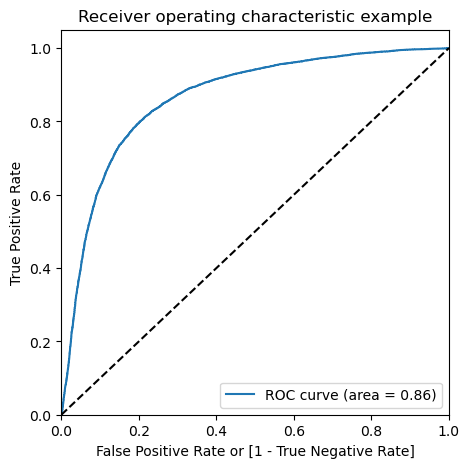

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### 7.7)  Optimal cutoff point 

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.275885,0,1,1,1,0,0,0,0,0,0,0
1,1,0.673431,1,1,1,1,1,1,1,1,0,0,0
2,1,0.521926,1,1,1,1,1,1,1,0,0,0,0
3,1,0.789245,1,1,1,1,1,1,1,1,1,0,0
4,0,0.297260,0,1,1,1,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.502124  1.000000  0.000000
0.1   0.1  0.629126  0.978948  0.276318
0.2   0.2  0.697212  0.955885  0.436332
0.3   0.3  0.746360  0.925546  0.565645
0.4   0.4  0.782476  0.885816  0.678254
0.5   0.5  0.796932  0.821629  0.772025
0.6   0.6  0.792528  0.736340  0.849196
0.7   0.7  0.757993  0.613849  0.903367
0.8   0.8  0.684828  0.425778  0.946089
0.9   0.9  0.555003  0.131314  0.982307


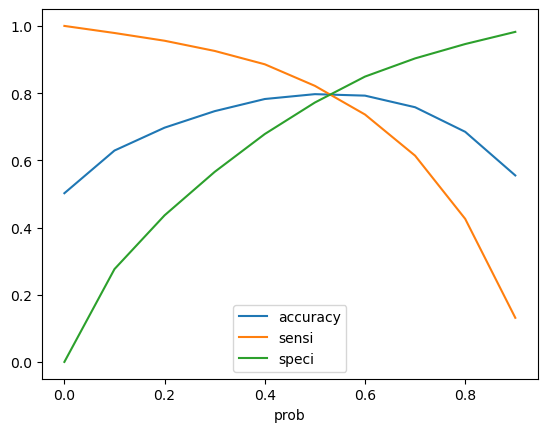

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### observarion :- 
<div class="alert alert-success" role="alert">
The point 0.52 is optimal for our model, so we will keep that
</div>

In [87]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.275885,0
1,1,0.673431,1
2,1,0.521926,1
3,1,0.789245,1
4,0,0.297260,0


In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[15152  4065]
 [ 3740 15641]]

Accuracy : 0.7977874501269496


### 7.8) Precision and recall tradeoff

In [89]:
from sklearn.metrics import precision_score, recall_score

In [90]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.793717649446869

In [91]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8070275011609308

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        1
 2        1
 3        1
 4        0
         ..
 38593    1
 38594    0
 38595    0
 38596    0
 38597    1
 Name: Churn, Length: 38598, dtype: int64,
 0        0
 1        1
 2        1
 3        1
 4        0
         ..
 38593    0
 38594    1
 38595    0
 38596    0
 38597    1
 Name: predicted, Length: 38598, dtype: int64)

In [94]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

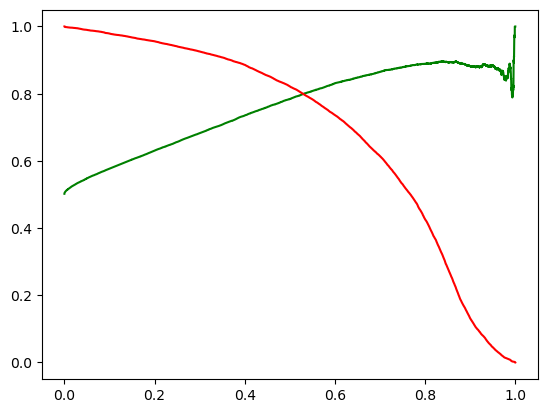

In [95]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 7.9) Model performance on the train set

In [96]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
47461,1,0.853051,1
40085,1,0.566895,1
49551,1,0.794121,1
13872,0,0.002129,0
39481,1,0.991161,1


In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6535 1818]
 [1591 6598]]

Accuracy : 0.7939185104582276


In [98]:
precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.7839828897338403

In [99]:
recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted)

0.8057149835144707

### 7.10) Model summary
<div class="alert alert-success" role="alert">
    
- Train set
    - Accuracy = 0.797
    - precision_score = 0.793
    - recall_score = 0.807
- Test set
    - Accuracy = 0.793
    - precision_score = 0.783
    - recall_score = 0.805
    
Overall, the model is performing well in the test set, what it had learnt from the train set.
</div>
    

# 8. Top 10 predictors

In [100]:
abs(res.params).sort_values(ascending=False)[0:11]

loc_ic_mou_8          1.469395
const                 1.300813
total_mou_8           0.864422
monthly_3g_8          0.839079
gd_ph_loc_ic_mou      0.804028
total_rech_num_8      0.687874
arpu_8                0.603290
monthly_2g_8          0.594305
last_day_rch_amt_8    0.575883
std_ic_t2t_mou_8      0.540246
loc_og_mou_8          0.509633
dtype: float64

#### Observation :- 
<div class="alert alert-success" role="alert">
    
- So using Logistic regression we are geting an accuracy of 79.77% on train data and 79.3% on test data
    
- We can clearly see most of the critical features are form the action phase, which is inline with the bussiness understanding that action phase needs more attention
</div>
    

### 8.1) Plots of important predictors for churn and non churn customers

In [101]:
# Creating churn dataframe
data_churn = telecom[telecom['churn'] == 1]
# Creating not churn dataframe
data_non_churn = telecom[telecom['churn'] == 0]

In [102]:
import seaborn as sns
sns.set_theme()

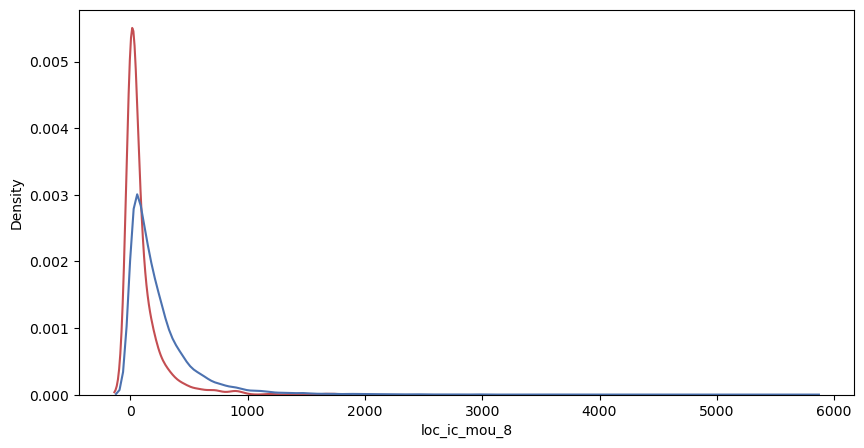

In [103]:
# Plotting loc_ic_mou_8 (local incoming calls) predictor for churn and not churn customers
plt.style.use("default")
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data_churn['loc_ic_mou_8'],color='r')
sns.kdeplot(data_non_churn['loc_ic_mou_8'],color='b')
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

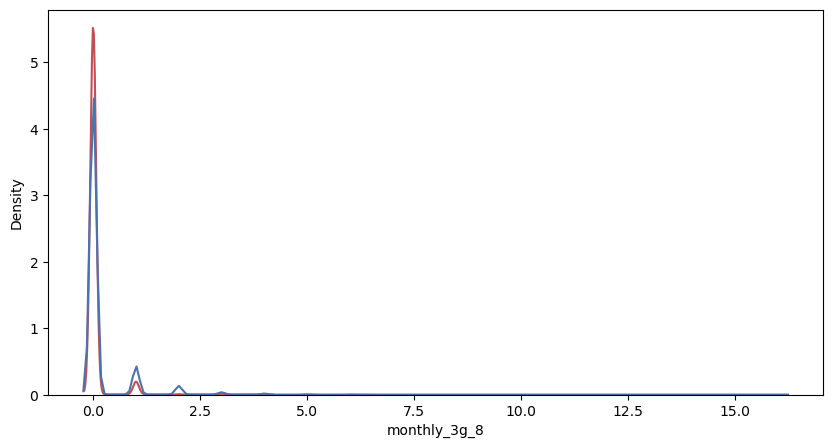

In [104]:
# Plotting monthly_3g_8 (3G network use) predictor for churn and not churn customers
plt.style.use("default")
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data_churn['monthly_3g_8'],color='r')
sns.kdeplot(data_non_churn['monthly_3g_8'],color='b')
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 0, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.

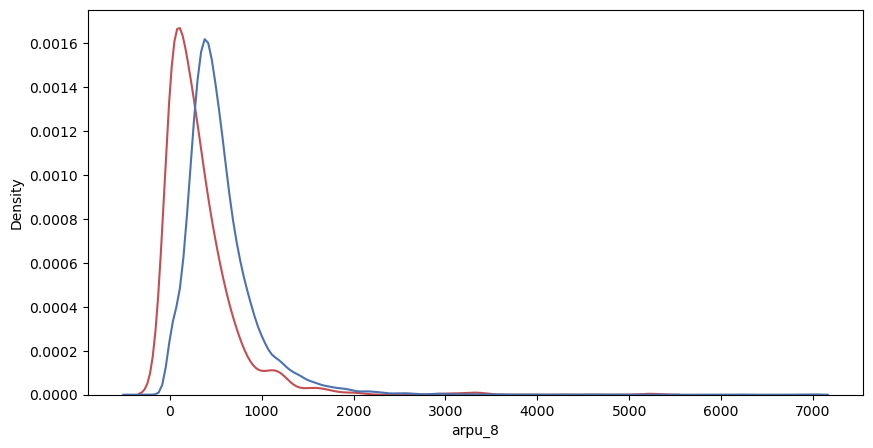

In [105]:
# Plotting arpu_8 (average revenue per user) predictor for churn and not churn customers
plt.style.use("default")
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data_churn['arpu_8'],color='r')
sns.kdeplot(data_non_churn['arpu_8'],color='b')
plt.show()

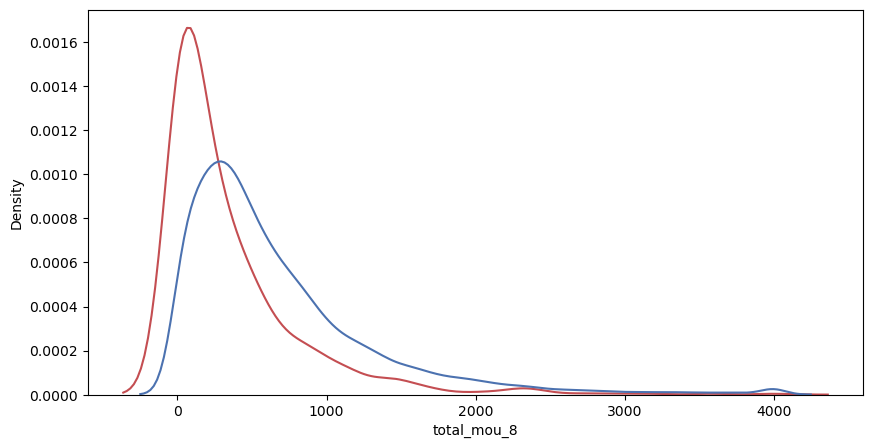

In [106]:
# Plotting total_mou_8 (min of usage - voice calls) predictor for churn and not churn customers
plt.style.use("default")
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data_churn['total_mou_8'],color='r')
sns.kdeplot(data_non_churn['total_mou_8'],color='b')
plt.show()

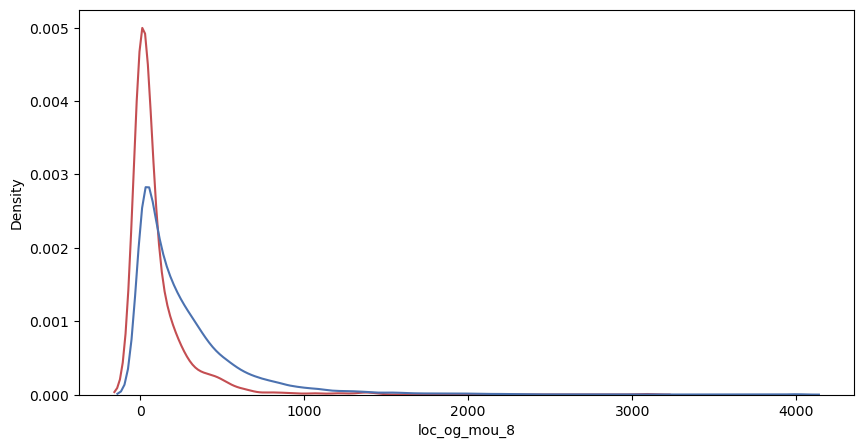

In [107]:
# Plotting loc_og_mou_8 (og=out going call) predictor for churn and not churn customers
plt.style.use("default")
%matplotlib inline
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data_churn['loc_og_mou_8'],color='r')
sns.kdeplot(data_non_churn['loc_og_mou_8'],color='b')
plt.show()